Overview
1. Exploratory Data Analysis
2. Why is Exploratory Data Analasys is important in data science?
3. Types of EDA
4. Exploratory Data Analysis (EDA) using python libraries.
5. Exploratory Data Analysis (EDA) using pandas profiling.

1. Exploratory Data Analysis(EDA):

Exploratory data analysis(EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

EDA का मतलब है डेटा को गहराई से देखना, समझना और उसे ग्राफ़ या चार्ट के रूप में दिखाकर उसकी विशेषताओं को जानना।     

Exploratory Data Analysis (EDA) का मतलब है किसी भी डाटासेट को गहराई से समझना और जांचना, ताकि हम उसके पैटर्न, समस्याएँ और विशेषताएँ जान सकें। यह आगे के विश्लेषण या मॉडल बनाने से पहले का पहला कदम होता है।

3. Types of EDA
- 1. Univeriate Anslysis
- 2. Bivariate Analysis
- 3. Multivariate Analysis
- 4. Time series Analysis
- 5. Missing data Analysis
- 6. Outlier Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv("train.csv")

In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [4]:
# show rows and columns
print(f'shape: {df.shape}')

shape: (9800, 18)


In [5]:
# count missing values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
# find out mean
postal_code_mean = df['Postal Code'].mean().round()
print(postal_code_mean)

55273.0


In [7]:
# by help of mean fill null values
df['Postal Code'].fillna(postal_code_mean)

0       42420.0
1       42420.0
2       90036.0
3       33311.0
4       33311.0
         ...   
9795    60610.0
9796    43615.0
9797    43615.0
9798    43615.0
9799    43615.0
Name: Postal Code, Length: 9800, dtype: float64

In [8]:
#update in original data set
df.loc[:, 'Postal Code'] = df['Postal Code'].fillna(postal_code_mean)

In [9]:
#final check null value 
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
# ye hai unvarite analysis means yek column ko analysis krna

In [ ]:
# kon se mode me kitna salse huwa hai wo nikal ne k liye
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

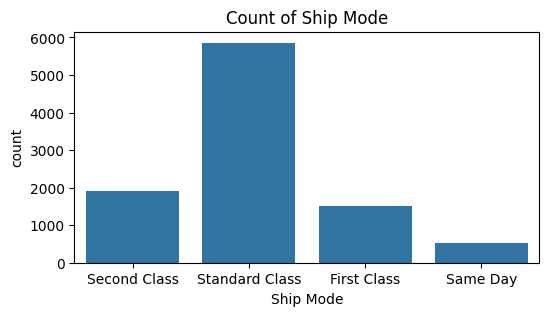

In [11]:
# kon se mode me kitna salse huwa hai wo plot  graph me dhikha ya
plt.figure(figsize=(6,3))
sns.countplot(x="Ship Mode", data=df)
plt.title("Count of Ship Mode")
plt.savefig('Count of Ship Mode.jpg')
plt.show()

In [12]:
# kon se mode me kitna salse huwa hai wo pie chart  graph me dhikha ya
x = df['Ship Mode'].value_counts().index # index ka use kr k x-axis me label ka naam nikala
print(x)
y = df['Ship Mode'].value_counts().values # values ka use kr k y-axis me sb ka total values nikala
print(y)

Index(['Standard Class', 'Second Class', 'First Class', 'Same Day'], dtype='object', name='Ship Mode')
[5859 1902 1501  538]


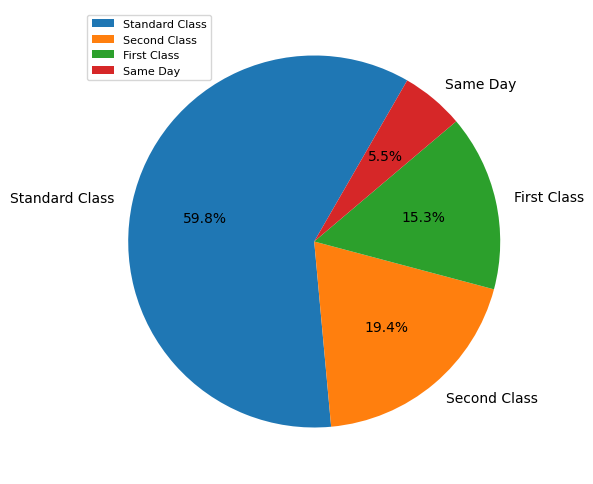

In [13]:
plt.figure(figsize=(6,8))
plt.pie(y, labels=x, startangle=60, autopct='%1.1f%%')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [14]:
#Bivariate analysis means two columns ko analysis krna

In [ ]:
# kis class k ander konsa product kitna sales huwa hai wo nikal ne k liye

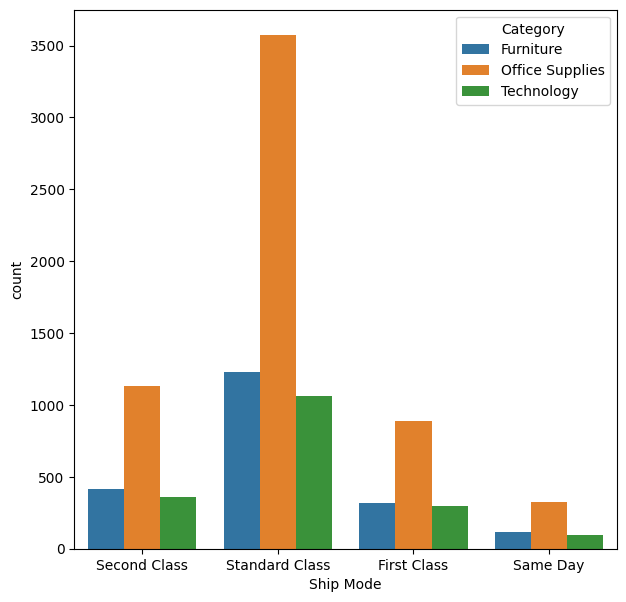

In [15]:
plt.figure(figsize=(7,7))
sns.countplot(x='Ship Mode', data=df, hue='Category')
plt.show()

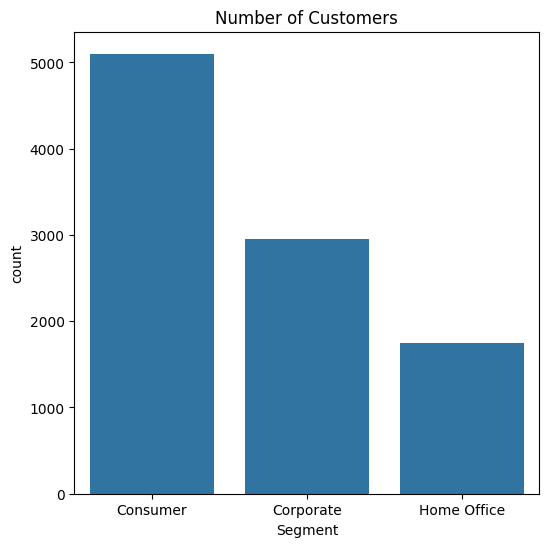

In [16]:
# kon sa segment me sab se jyada customers hai
plt.figure(figsize=(6,6))
sns.countplot(x='Segment', data=df)
plt.title("Number of Customers")
plt.show()

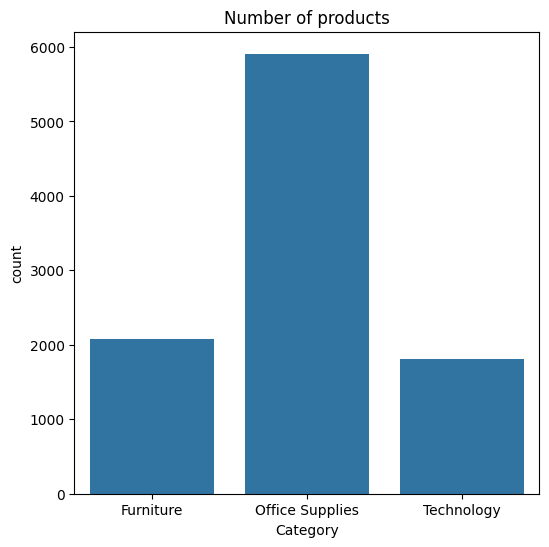

In [17]:
# kis catagorty ka product sab se jyada hai
plt.figure(figsize=(6,6))
sns.countplot(x='Category', data=df)
plt.title("Number of products")
plt.show()


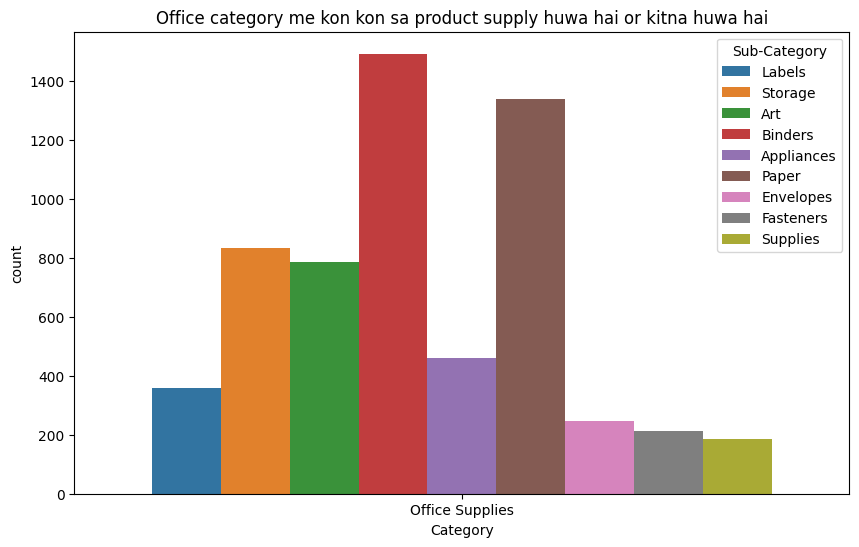

In [18]:
# office category me kon kon sa or kitna product supply huwa hai ya kitna product sales huwa hai
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=df[df['Category'] == 'Office Supplies'], hue='Sub-Category')
plt.title("Office category me kon kon sa product supply huwa hai or kitna huwa hai")
plt.show()

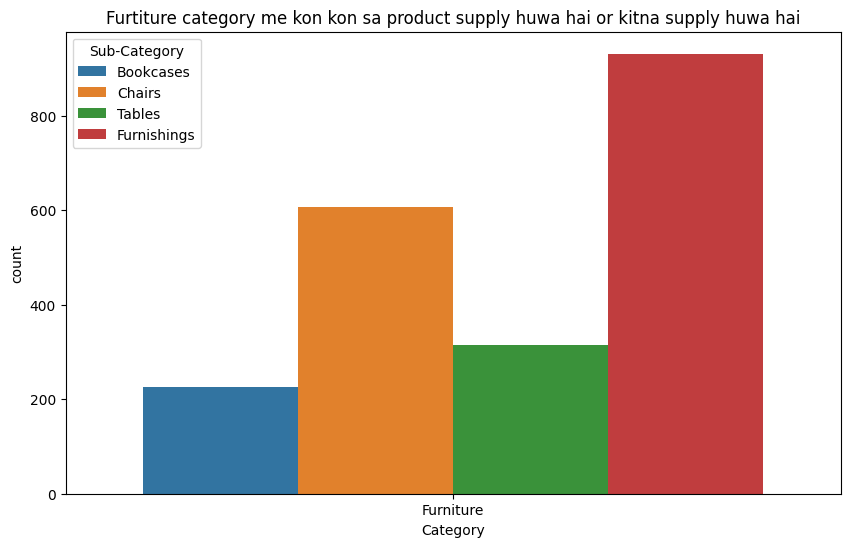

In [19]:
# Furniture category me kon kon sa or kitna product supply huwa hai ya kitna product sales huwa hai
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=df[df['Category'] == 'Furniture'], hue='Sub-Category')
plt.title("Furtiture category me kon kon sa product supply huwa hai or kitna supply huwa hai")
plt.show()

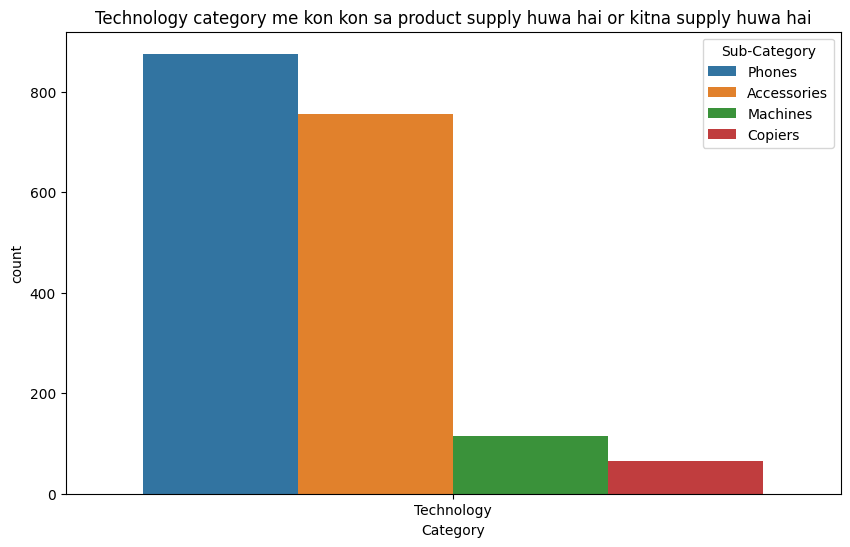

In [20]:
# Technology category me kon kon sa or kitna product supply huwa hai ya kitna product sales huwa hai
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=df[df['Category'] == 'Technology'], hue='Sub-Category')
plt.title("Technology category me kon kon sa product supply huwa hai or kitna supply huwa hai")
plt.show()

In [21]:
# kon si date me kitne order gaye hai ya sales huwa hai


In [22]:
# isse check kiya data type to to data type object me hai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [23]:
#order date ko show kiya
df['Order Date']

0       08/11/2017
1       08/11/2017
2       12/06/2017
3       11/10/2016
4       11/10/2016
           ...    
9795    21/05/2017
9796    12/01/2016
9797    12/01/2016
9798    12/01/2016
9799    12/01/2016
Name: Order Date, Length: 9800, dtype: object

In [24]:
# order date ka data type object hai to usko change kr ne k liye
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")


In [106]:
# year ko nikala
df['Order Date'].dt.year

0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9795    2017
9796    2016
9797    2016
9798    2016
9799    2016
Name: Order Date, Length: 9800, dtype: int32

In [25]:
# order year ka column add kiya 
df['Order Year'] = df['Order Date'].dt.year

In [26]:
# kon sa year me kitna order sale huwa hai
df['Order Year'].value_counts()

Order Year
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64

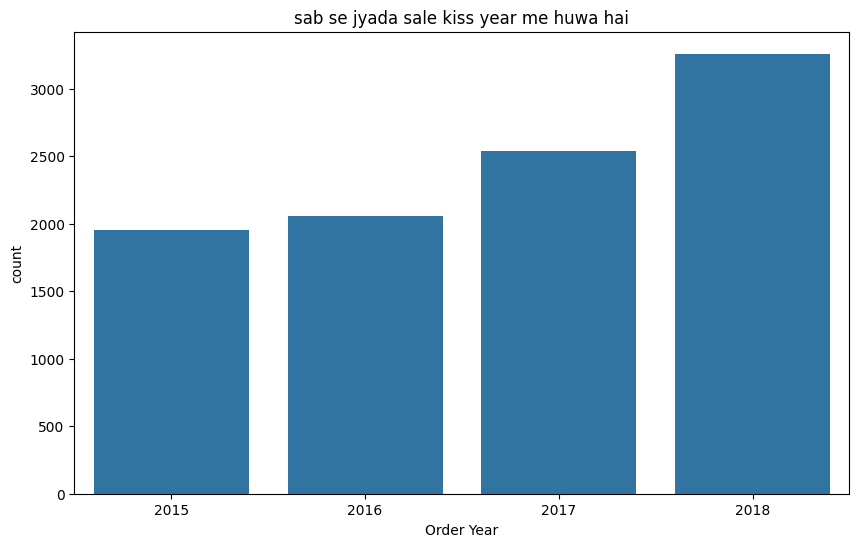

In [27]:
# order year ka countplot show kiya
plt.figure(figsize=(10,6))
sns.countplot(x='Order Year', data=df)
plt.title("sab se jyada sale kiss year me huwa hai")
plt.show()

In [ ]:

# kis  category k me kitna profit huwa hai
sns.barplot(x='Category', y='Profit', data=df, estimator='sum')
plt.show()

In [29]:
# kis state me kitna sele huwa hai
df['State'].value_counts()

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 41
Nevada  

In [31]:
# kis state me kitna sele huwa hai show top 5 state
df['State'].value_counts()[:5]

State
California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Name: count, dtype: int64

In [30]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Order Year       0
dtype: int64